## Comparison of Algorithms
#### Importing libraries

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Load Datasets

In [3]:
url = "Test-Data-10.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df.head(20)

,Year,Not Suicide(0)/Suicide(1),Age,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
0,2018,0,30,F,Islam,Muslim,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,...,0,0,None,Asthma,None,0,0,0,0,0
1,2018,0,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,...,0,0,None,Other,None,0,1,0,0,0
2,2018,0,85,M,Islam,Muslim,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,...,0,0,None,Diabetes,None,0,1,0,0,0
3,2017,1,87,M,Christian,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,0,None,Chronic pain,Frequent,1,1,1,1,1
4,2018,0,59,M,Islam,Muslim,Pensioners,Unmarried,Other,Alzheimer's disease,...,0,0,None,COPD,None,0,1,0,1,1
5,2017,1,31,M,Other,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Unmarried,Passed G.C.E (O/L),Harrasment by the husband & family disputes,...,1,1,None,Other,Frequent,1,1,1,1,1
6,2018,0,75,M,Christian,Burger,Armed Services,Married,Passed G.C.E (A/L),Natural Death,...,0,0,None,Unknown,None,0,0,0,0,0
7,2018,1,47,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,1,None,Other,Moderate,0,0,1,1,0
8,2018,0,58,M,Christian,Burger,Armed Services,Unmarried,University Degree or above,Diabetes,...,0,0,None,Unknown,None,0,0,0,0,0
9,2018,0,36,M,Hindu,Tamil,Armed Services,Married,University Degree or above,Natural Death,...,0,0,None,Unknown,None,0,1,0,0,0


#### Replacing unwanted labels with a unique label

In [4]:
df['Reason'].replace(['Asthma', "Alzheimer's disease", 'Diabetes',
              'Cirrhosis', 'Ischemic heart disease', 
              'Road Accident','Chronic kidney disease'],
             ['Natural Death','Natural Death','Natural Death','Natural Death',
              'Natural Death','Natural Death','Natural Death'], inplace = True)
df['Reason'].replace(['Stroke/Chronic diseases & Physical disabilities'],
             ['Chronic diseases & Physical disabilities'], inplace = True)
df1 = df[include]

#### Label Encoder

In [5]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))

for x, y in mapping_dict.items():
  print(x, y)

    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        3     1                     0             2   
1    91       0        3     1                     8             1   
2    85       1        3     1                     9             1   
3    87       1        1     3                    12             1   
4    59       1        3     1                     4             2   
5    31       1        4     3                     1             2   
6    75       1        1     0                     2             1   
7    47       1        0     3                    12             1   
8    58       1        1     0                     2             2   
9    36       1        2     4                     2             1   
10   87       1        0     3                    12             1   
11   73       1        1     0                     3             1   
12   44       1        0     3                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df1[feature_cols] # Features
y = df1['Not Suicide(0)/Suicide(1)']

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#### Import Random Forest Model

[0.         0.04575163 1.        ]
[0.         0.99319728 1.        ]
[2 1 0]
0.9737228224623182


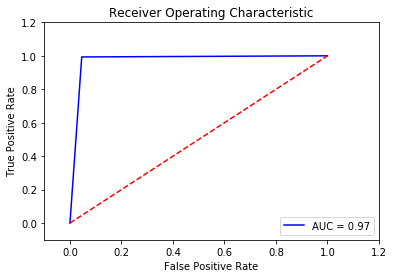

In [7]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
y_pred2 = rfc.predict(X_train)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import Decision Tree Model

[0.         0.05228758 1.        ]
[0.         0.93877551 1.        ]
[2 1 0]
0.9432439642523677


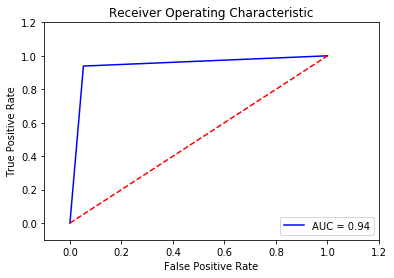

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_clf = clf.predict(X_test)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf)
clf_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(clf_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% clf_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import SVM-Linear model

[0.         0.03267974 1.        ]
[0.         0.96598639 1.        ]
[2 1 0]
0.9666533279978659


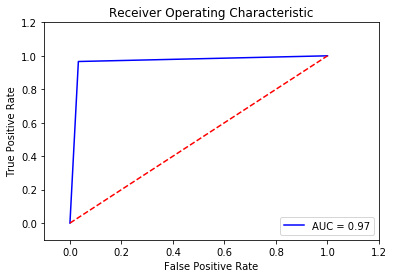

In [9]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
svmL = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmL.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svmL = svmL.predict(X_test)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmL)
svmL_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(svmL_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% svmL_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Import SVM-Polynomial kernal Model


[0.         0.39215686 1.        ]
[0.         0.93877551 1.        ]
[2 1 0]
0.7733093237294919


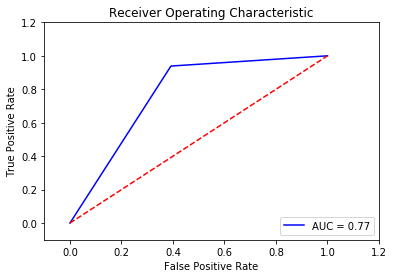

In [10]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
svmP = svm.SVC(kernel='poly') # polynomial Kernel

#Train the model using the training sets
svmP.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svmP = svmP.predict(X_test)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmP)
svmP_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(svmP_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% svmP_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import SVM-RBF kernal Model

[0.         0.22222222 1.        ]
[0.         0.82993197 1.        ]
[2 1 0]
0.8038548752834467


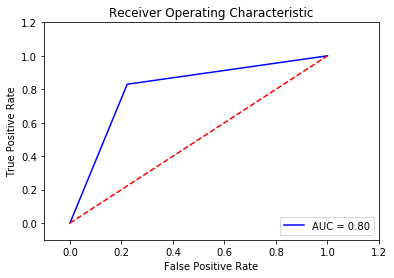

In [11]:
#Importing the svm model
from sklearn import svm

#Build a svm Classifier
svmR = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
svmR.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svmR = svmR.predict(X_test)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmR)
svmR_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(svmR_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% svmR_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import K-Neighbors Classifier Model

[0.         0.16339869 1.        ]
[0.         0.74829932 1.        ]
[2 1 0]
0.7924503134587169


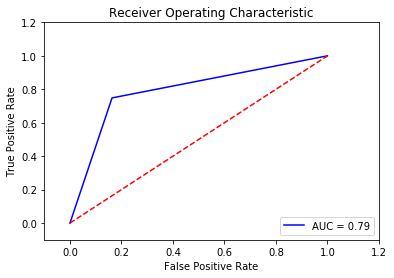

In [12]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
knn_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(knn_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% knn_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import GaussianNB Classifier Model

[0.         0.11764706 1.        ]
[0.         0.97959184 1.        ]
[2 1 0]
0.9309723889555822


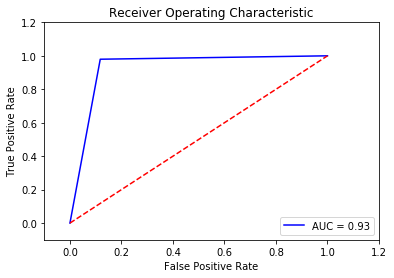

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gnb)
gnb_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(gnb_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% gnb_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import LinearSVC Classifier Model

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.         0.07843137 1.        ]
[0.         0.97959184 1.        ]
[2 1 0]
0.9505802320928372


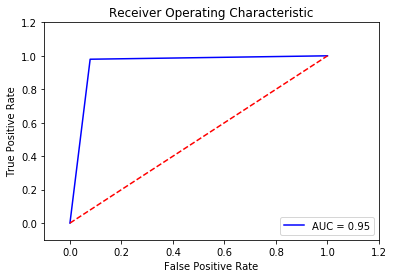

In [14]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred_linear_svc = svc.predict(X_test)
acc_linear_svc = round(svc.score(X_train, y_train) * 100, 2)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_linear_svc)
svc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(svc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% svc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import Perceptron Model

[0.         0.11111111 1.        ]
[0.         0.95238095 1.        ]
[2 1 0]
0.9206349206349206


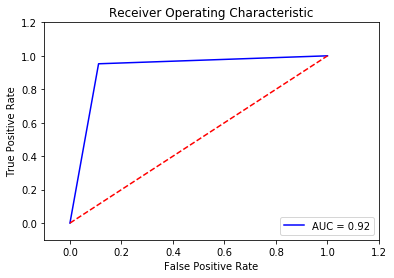

In [15]:
ppt = Perceptron(max_iter=5, tol=None)
ppt.fit(X_train, y_train)
y_pred_perceptron = ppt.predict(X_test)
acc_perceptron = round(ppt.score(X_train, y_train) * 100, 2)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_perceptron)
ppt_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(ppt_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% ppt_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Import LogisticRegression  Classifier Model

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.         0.03921569 1.        ]
[0.         0.97278912 1.        ]
[2 1 0]
0.9206349206349206


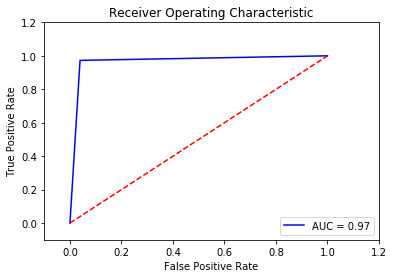

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred_logreg=logreg.predict(X_test)

# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logreg)
log_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(ppt_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% log_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: Con

LR: 0.957143 (0.014983)
RFC: 0.967143 (0.003499)
KNN: 0.821429 (0.041404)
DTC: 0.930000 (0.009476)
NB: 0.941429 (0.013851)
SVM-L: 0.957143 (0.019166)
SVM-Poly: 0.765714 (0.022768)
SVM-RBF: 0.795714 (0.023299)
Perceptron: 0.702857 (0.147191)
L-SVC: 0.945714 (0.018952)


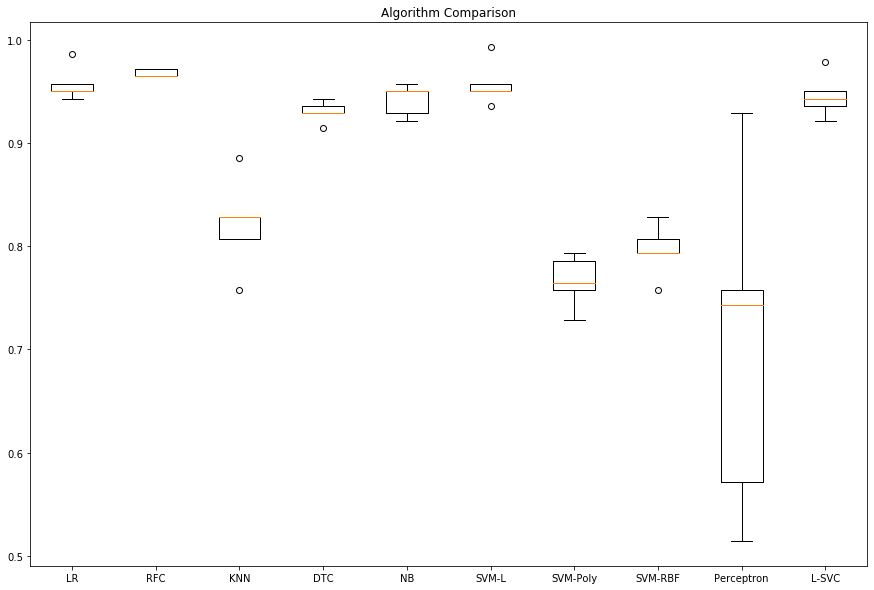

In [17]:
#Logistic Regression (LR)
#Random Forest Classifier (RFC)
#K-Nearest Neighbors (KNN).
#DecisionTreeClassifier (DTC).
#Gaussian Naive Bayes (NB).
#Support Vector Machines Linear kernel (SVM-L).
#Support Vector Machines Polynomial kernel (SVM-Poly).
#Support Vector Machines RBF kernel (SVM-RBF).

models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM-L', svm.SVC(kernel='linear')))
models.append(('SVM-Poly', svm.SVC(kernel='poly')))
models.append(('SVM-RBF', svm.SVC(kernel='rbf')))
models.append(('Perceptron', Perceptron(max_iter=5, tol=None)))
models.append(('L-SVC', LinearSVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=0)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### Roc Comparison

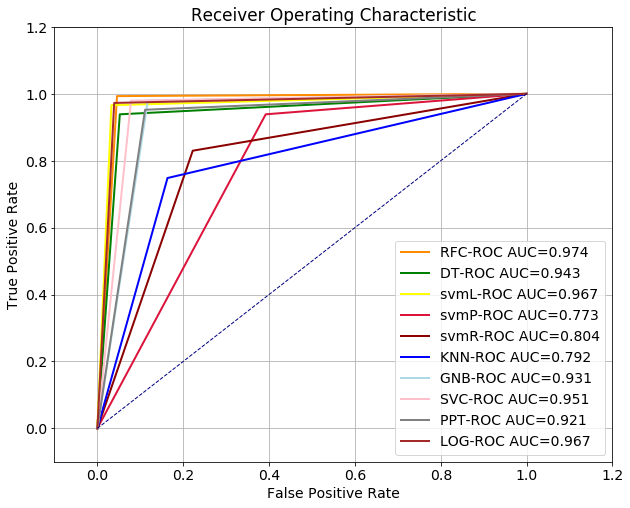

In [20]:
import matplotlib


plt.figure(figsize=(10, 8))
matplotlib.rcParams.update({'font.size': 14})
plt.title('Receiver Operating Characteristic')
plt.grid()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2,
         label='RFC-ROC AUC={0:.3f}'.format(roc_auc))
Gini_coefficient_rfc=2*roc_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf)
clf_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='green', lw=2,
         label='DT-ROC AUC={0:.3f}'.format(clf_auc))
Gini_coefficient_clf=2*clf_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmL)
svmL_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='yellow', lw=2,
         label='svmL-ROC AUC={0:.3f}'.format(svmL_auc))
Gini_coefficient_svmL=2*svmL_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmP)
svmP_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='crimson', lw=2,
         label='svmP-ROC AUC={0:.3f}'.format(svmP_auc))
Gini_coefficient_svmP=2*svmP_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svmR)
svmR_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='darkred', lw=2,
         label='svmR-ROC AUC={0:.3f}'.format(svmR_auc))
Gini_coefficient_svmR=2*svmR_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
knn_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2,
         label='KNN-ROC AUC={0:.3f}'.format(knn_auc))
Gini_coefficient_knn=2*knn_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gnb)
gnb_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='lightblue', lw=2,
         label='GNB-ROC AUC={0:.3f}'.format(gnb_auc))
Gini_coefficient_gnb=2*gnb_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_linear_svc)
svc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2,
         label='SVC-ROC AUC={0:.3f}'.format(svc_auc))
Gini_coefficient_svc=2*svc_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_perceptron)
ppt_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='grey', lw=2,
         label='PPT-ROC AUC={0:.3f}'.format(ppt_auc))
Gini_coefficient_ppt=2*ppt_auc - 1

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logreg)
log_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='brown', lw=2,
         label='LOG-ROC AUC={0:.3f}'.format(log_auc))
Gini_coefficient_log=2*log_auc - 1

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



#### Gini Coefficient Index


In [19]:
print("Gini_coefficient of RFC is ", Gini_coefficient_rfc)
print("Gini_coefficient of DT is ", Gini_coefficient_clf)
print("Gini_coefficient of svmL is ", Gini_coefficient_svmL)
print("Gini_coefficient of svmP is ", Gini_coefficient_svmP)
print("Gini_coefficient of svmR is ", Gini_coefficient_svmR)
print("Gini_coefficient of KNN is ", Gini_coefficient_knn)
print("Gini_coefficient of svc is ", Gini_coefficient_svc)
print("Gini_coefficient of GNB is ", Gini_coefficient_gnb)
print("Gini_coefficient of PPT is ", Gini_coefficient_ppt)
print("Gini_coefficient of LOG is ", Gini_coefficient_log)



Gini_coefficient of RFC is  0.9474456449246365
Gini_coefficient of DT is  0.8864879285047353
Gini_coefficient of svmL is  0.9333066559957317
Gini_coefficient of svmP is  0.5466186474589838
Gini_coefficient of svmR is  0.6077097505668934
Gini_coefficient of KNN is  0.5849006269174337
Gini_coefficient of svc is  0.9011604641856743
Gini_coefficient of GNB is  0.8619447779111644
Gini_coefficient of PPT is  0.8412698412698412
Gini_coefficient of LOG is  0.9335734293717486
